# Exercise 1

## 1.1

**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable?**

The variable we are most unlikely to pick as the independent variable to predict ``mpg`` would be acceleration. We wouldn't choose acceleration since the correlation coefficient has the lowest absolute value compared to every other metric on the heatmap

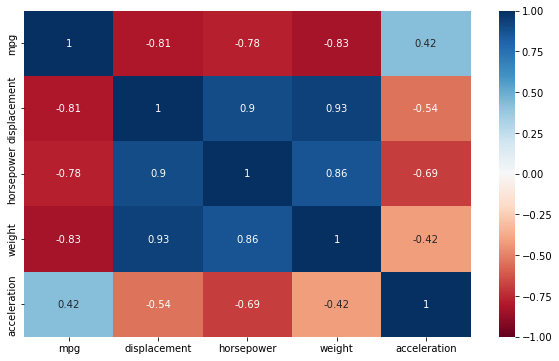

In [239]:
#importing all the libraries needed
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("auto-mpg.csv")
corrVar = df.corr()

plt.figure(figsize=(10,6))
_ = sns.heatmap(corrVar, vmin= -1, vmax=1, center=0, annot=True, cmap='RdBu')

## 1.2

**If we are using horsepower to predict mpg, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression)?**

Based on the shape of the pairplot I would think that Polynomial Regression would lead to the best performance to predict mpg, it looks like the data has a defined curve to it, enough so that a straight line from a Linear Regression would not be the best fit line. Logistic Regression would definitely not be a reasonable method as the output (mpg in this case) is non-binary.

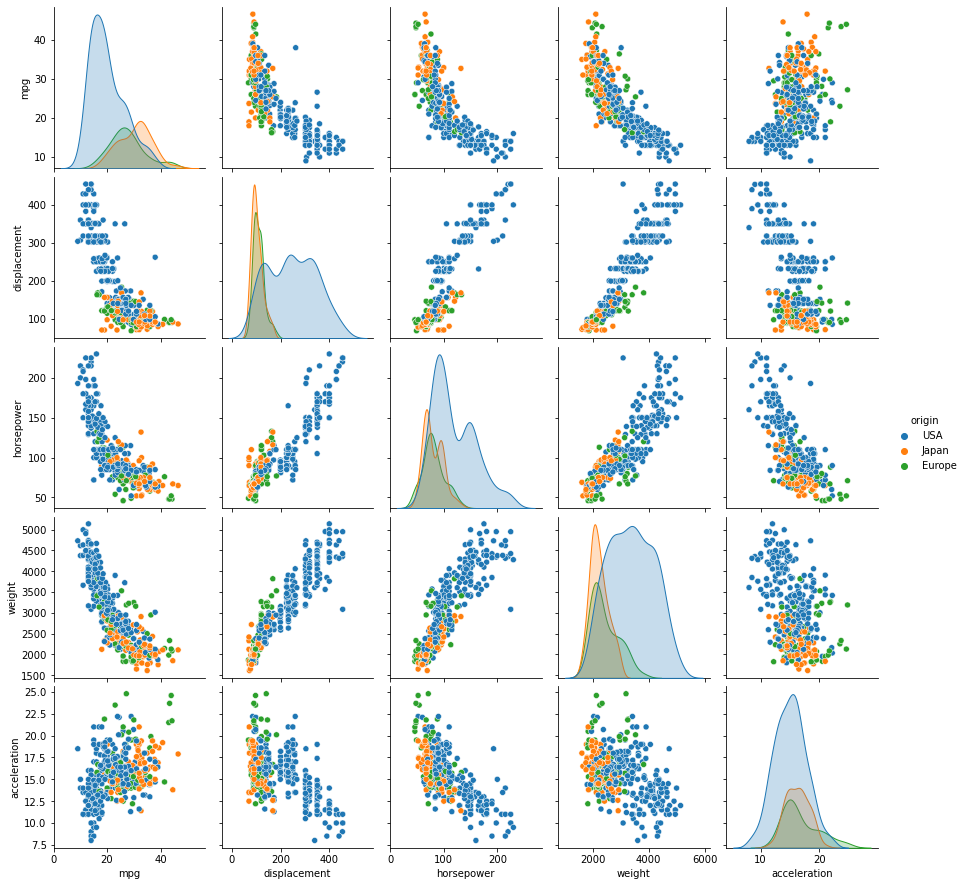

In [240]:
sns.pairplot(data=df, hue='origin', vars=['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], diag_kind='kde')


# Exercise 2 - Linear and Polynomial Regression (40 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

In [241]:
from sklearn.model_selection import train_test_split

x_input = df.weight
y_output = df.mpg

X_train, X_test, y_train, y_test = train_test_split(x_input, y_output, test_size = .2, random_state = 0)


### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()
regmodel = reg.fit(X=np.asarray(X_train).reshape(-1, 1), y=y_train)
reg_predictions = reg.predict(X=np.asarray(X_test).reshape(-1, 1))

# print(np.asarray(X_test).reshape(-1, 1))
# print(reg_predictions)

print('Mean squared error: %.2f' % mean_squared_error(y_test, reg_predictions))

Mean squared error: 19.98


### Exercise 2.3 - Polynomial Regression (25 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


I do not see any signs of overfitting in my MSE calculations. it goes down consistantly with each higher degree, but I may be overfitting my model for the entire sample in the CSV file. Theres no way to tell without more data.

In [243]:
x_train_df = pd.DataFrame(X_train)

model2 = np.poly1d(np.polyfit(x = x_train_df.loc[:,'weight'], y = y_train, deg = 2))

reg_predictions2Train = model2(x_train_df)

reg_predictions2Test = model2(X_test)

print('Training Mean squared error (degree 2): %.2f' % mean_squared_error(y_train, reg_predictions2Train))

print('Testing Mean squared error (degree 2): %.2f' % mean_squared_error(y_test, reg_predictions2Test))

# myline = np.linspace(x_train_df.min(axis=0), x_train_df.max(axis=0))

# plt.scatter(x_input, y_output)

# plt.plot(myline, model2(myline))

# plt.show()

# /////////////////////////////////////////////////////////////

model3 = np.poly1d(np.polyfit(x = x_train_df.loc[:,'weight'], y = y_train, deg = 3))

reg_predictions3Train = model3(x_train_df)

reg_predictions3Test = model3(X_test)

print('Training Mean squared error (degree 3): %.2f' % mean_squared_error(y_train, reg_predictions3Train))

print('Testing Mean squared error (degree 3): %.2f' % mean_squared_error(y_test, reg_predictions3Test))


# plt.scatter(x_input, y_output)

# plt.plot(myline, model3(myline))

# plt.show()

# ///////////////////////////////////////////////////////////

model4 = np.poly1d(np.polyfit(x = x_train_df.loc[:,'weight'], y = y_train, deg = 4))

reg_predictions4Train = model4(x_train_df)

reg_predictions4Test = model4(X_test)

print('Training Mean squared error (degree 4): %.2f' % mean_squared_error(y_train, reg_predictions4Train))

print('Testing Mean squared error (degree 4): %.2f' % mean_squared_error(y_test, reg_predictions4Test))


# plt.scatter(x_input, y_output)

# plt.plot(myline, model4(myline))

# plt.show()


Training Mean squared error (degree 2): 16.85
Testing Mean squared error (degree 2): 19.14
Training Mean squared error (degree 3): 16.85
Testing Mean squared error (degree 3): 19.15
Training Mean squared error (degree 4): 16.83
Testing Mean squared error (degree 4): 19.14


## Exercise 3 - Logistic Regression (40 points in total)

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 3.1 - Processing and Splitting the Dataset (10 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >


In [244]:
df = pd.read_csv("auto-mpg.csv")
data1 = df[df.origin != "Europe"]  # Using logical condition

y_output = data1.origin
del data1['origin']
x_input = data1

x_train, x_test, y_train, y_test = train_test_split(x_input, y_output, test_size = .2, random_state = 0)


### Exercise 3.2 - Logistic Regression (30 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br >
Then, **if we are distinguishing between Japan and Europe this time, how do you think the model performance(in terms of accuracy) will change? Provide your reasoning.** (Hint: Exercise 1)

Requirements
 - Report the testing precision and recall for both regions.
 
    If we distinguish between Japan and Europe the precision would go down since the data on Japanese cars overlaps with European cars much more than the data on USA cars. This makes a bit of sense since USA cars have big displacements, heavy weight, and high horsepower where Japanese cars are lightweight, low displacement, and low horsepower cars. European cars share many traits with japanese cars and tend to differentiate based on other features than just numbers (comfort, safety, etc.).

In [245]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

classifier = LogisticRegression(solver='lbfgs',random_state=0)
classifier.fit(x_train, y_train)
predicted_y = classifier.predict(x_test)


print('Precision Score for Japan: %.2f' % precision_score(y_test, predicted_y, pos_label = 'Japan'))
print('Recall Score for Japan: %.2f' %recall_score(y_test, predicted_y, pos_label = 'Japan'))

print('Precision Score for USA: %.2f' % precision_score(y_test, predicted_y, pos_label = 'USA'))
print('Recall Score for USA: %.2f' % recall_score(y_test, predicted_y, pos_label = 'USA'))


Precision Score for Japan: 0.83
Recall Score for Japan: 0.59
Precision Score for USA: 0.87
Recall Score for USA: 0.96
